In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import tensorflow as tf
from keras.utils import plot_model

1/1 [==============================] - 1s 762ms/step
Predicted: [('n01665541', 'leatherback_turtle', 0.84285605)]


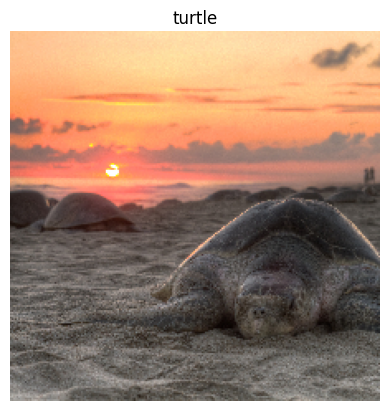

In [2]:
from matplotlib import pyplot as plt

model = VGG16(weights='imagenet')

img_path = "..\\turtle.jpg"""
img = image.load_img(img_path, target_size=(224, 224), keep_aspect_ratio=True)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.convert_to_tensor(preprocess_input(x))

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=1)[0])
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.title("turtle")
plt.show()

In [12]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

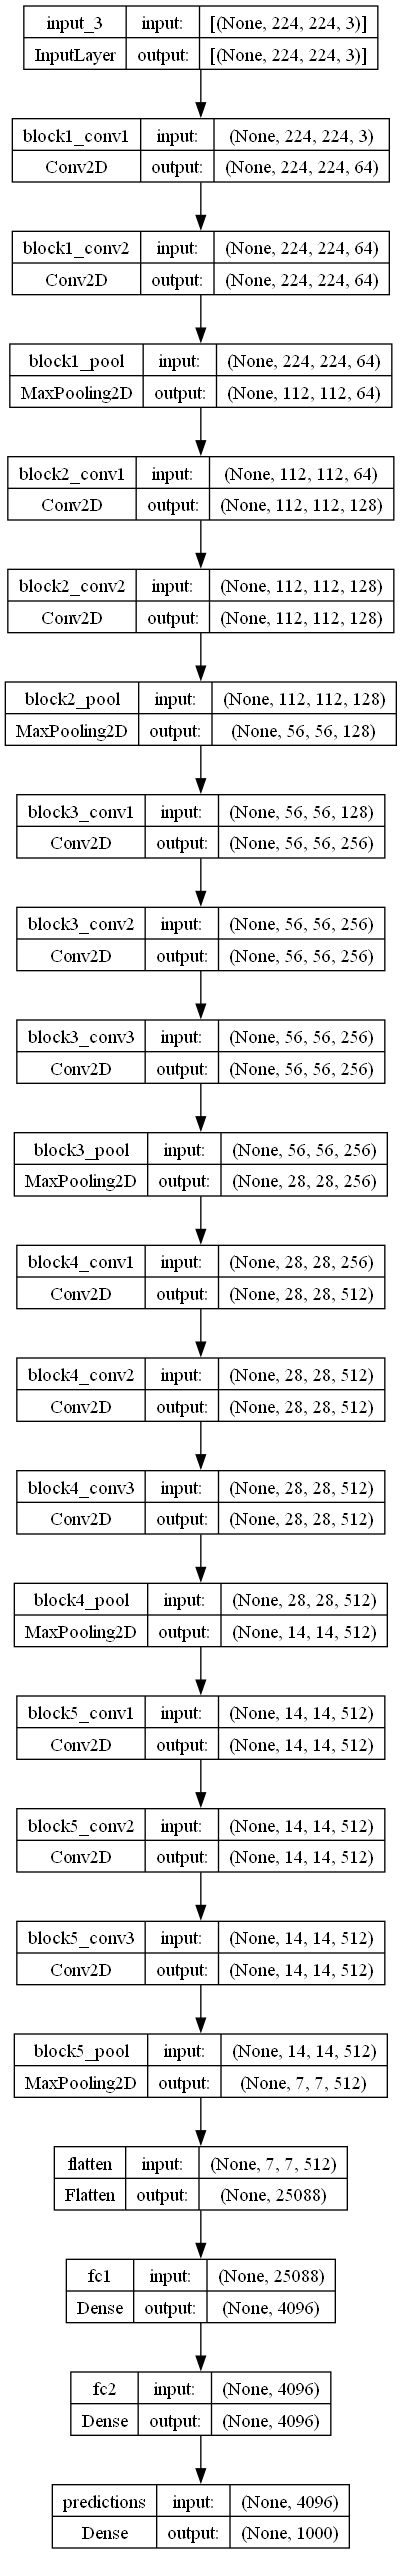

In [9]:
plot_model(model, show_layer_names=True, show_shapes=True)

In [15]:
model.layers

In [6]:
from VGG16.utils import split_sequential_model
import keras

head_network, tail_network = split_sequential_model(model, 20)

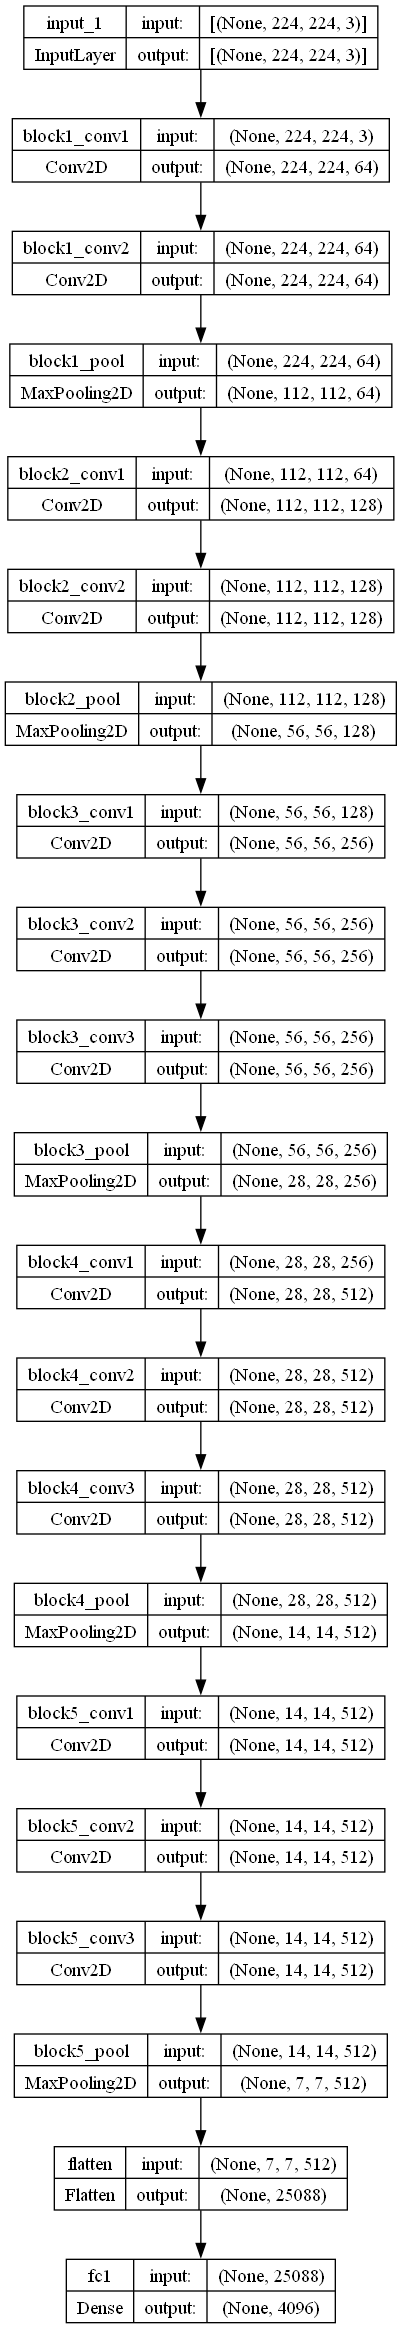

In [7]:
plot_model(head_network, show_layer_names=True, show_shapes=True)

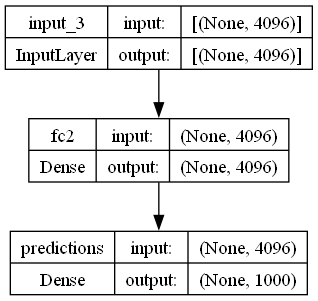

In [8]:
plot_model(tail_network, show_layer_names=True, show_shapes=True)

In [15]:
head_network.summary()
tail_network.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                

In [47]:
inter = head_network.predict(x)
out = tail_network.predict(inter)

1/1 [==============================] - 1s 513ms/step


In [49]:
print('Predicted:', decode_predictions(preds, top=5)[0])

Predicted: [('n01665541', 'leatherback_turtle', 0.84285444), ('n01664065', 'loggerhead', 0.065891795), ('n02437312', 'Arabian_camel', 0.019763125), ('n09428293', 'seashore', 0.011341824), ('n02504013', 'Indian_elephant', 0.008240178)]


In [50]:
print('Predicted:', decode_predictions(out, top=5)[0])

Predicted: [('n01665541', 'leatherback_turtle', 0.84285444), ('n01664065', 'loggerhead', 0.065891795), ('n02437312', 'Arabian_camel', 0.019763125), ('n09428293', 'seashore', 0.011341824), ('n02504013', 'Indian_elephant', 0.008240178)]


In [13]:
def representative_dataset():
    for _ in range(100):
      data = np.random.rand(1, 224, 224, 3)
      yield [data.astype(np.float32)]


In [14]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_model = converter.convert()

# Save the model.
with open('full_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmpqedonsih\assets


INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmpqedonsih\assets
C:\Users\danie\tuWien\10_semester\tensorflow\venv\Lib\site-packages\tensorflow\lite\python\convert.py:947: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [16]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [25]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.int8)
input_data = tf.image.convert_image_dtype(x, dtype=tf.int8)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print('Predicted:', decode_predictions(output_data, top=5)[0])

Predicted: [('n03788365', 'mosquito_net', -120), ('n15075141', 'toilet_tissue', -121), ('n03291819', 'envelope', -121), ('n04476259', 'tray', -124), ('n04209239', 'shower_curtain', -124)]


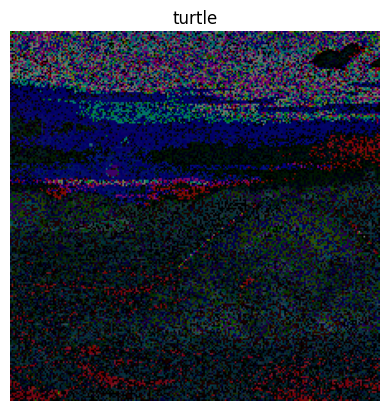

In [37]:
plt.figure()
plt.imshow(input_data[0])
plt.axis('off')
plt.title("turtle")
plt.show()

In [40]:
import tensorflow_datasets as tfds

ImportError: cannot import name 'core' from partially initialized module 'tensorflow_datasets' (most likely due to a circular import) (C:\Users\danie\tuWien\10_semester\tensorflow\venv\Lib\site-packages\tensorflow_datasets\__init__.py)

In [ ]:
test_ds = tfds.load('mnist', split=['train', 'test[:50%]'])